# Spectrogram Searching 
I will be trying to recreate spectrograms from earlier papers and messing with basic color mappings, frequency filters, etc.

In [18]:
# basic imports
from obspy.clients.fdsn import Client
from obspy import read
import obspy
import numpy as np
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib as mplt
import matplotlib.dates as mdates

In [32]:
# retrieve the data shown in the 2015 Bromirski paper
starttime = UTCDateTime('2015-01-22T00:00:00')
endtime = UTCDateTime('2015-02-03T00:00:00')

# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR10'
loc = '--'
chan = 'LHN'

# query for data
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

In [33]:
# # optionally write file
# if loc == "--":
#     st.write(net + '-' + sta + '-' + chan + '.SAC', format = "mseed")
# else:
#     st.write(net + '-' + sta + '-' + loc + '-' + ch + ".mseed", format = "mseed")

In [34]:
# # optionally read in file
# #replace w variables
# st = read('XH-DR10-HHN.mseed')

# # query for inventory
# # replace w/ variables
# inventory = client.get_stations(network="XH", station="DR10", channel = "HHN", format = "xml", starttime=starttime, endtime=endtime)
# print(inventory)

# # attach response
# st.attach_response(inventory)

In [35]:
#remove response
# remove response
st_rem = st.copy()
st_rem.remove_response(output='VEL', plot=False)

# filter to required frequencies
st_rem.filter('bandpass', freqmin = 0.001, freqmax = 0.08)

1 Trace(s) in Stream:
XH.DR10..LHN | 2015-01-22T00:00:00.999990Z - 2015-02-02T23:59:59.999990Z | 1.0 Hz, 1036800 samples

This is my attempt at using ObsPy's built-in spectrogram function.

In [36]:
# commented out for speed of compilation
# st_rem.spectrogram(log = True, dbscale = True, wlen = 10, cmap = 'BuPu')

The above spectrogram clearly looks nothing like the one I am trying to recreate from Bromirski's 2015 paper, shown below. 

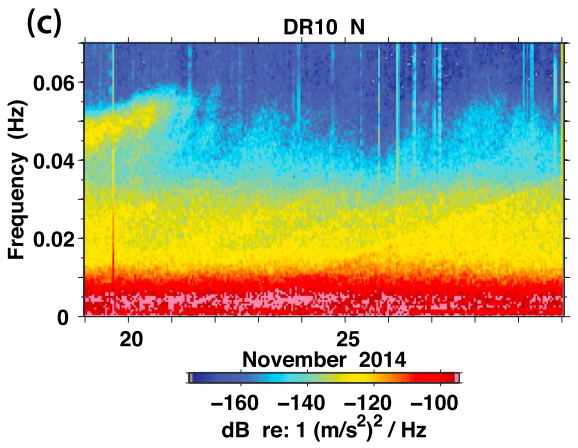

## Matplotlib's plt.specgram
Thus, I will now be trying to use matplotlib's specgram() function to recreate this plot.


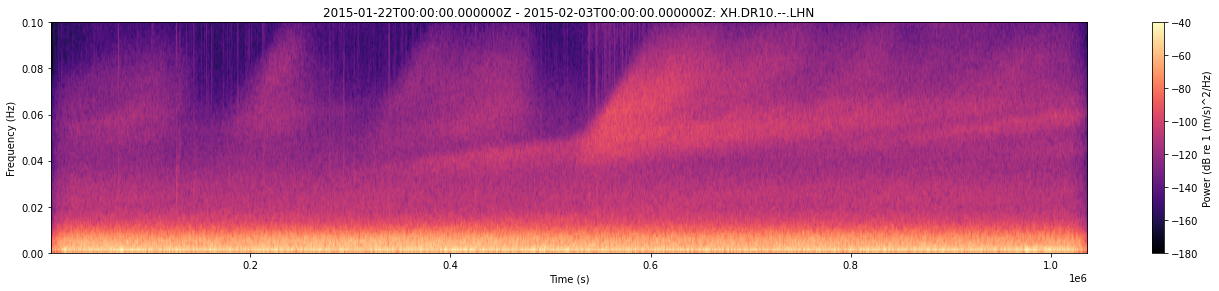

In [46]:
# copy the stream 
st_mpl = st.copy()


# remove-response
st_mpl = st_mpl.remove_response(output="VEL", plot=False)

### Plot figures axes 
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
# ax2 = fig.add_axes([1.21, 0.1, 0.03, 0.8])
ax = plt.gca()


power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                      mode='psd', scale='dB', cmap='magma',
                                      scale_by_freq=True, detrend = 'constant', noverlap = 1000) 
# optionally subtract the medianmagma
# data = st_mpl[0].data
# median = np.median(data)
# print(data)
# print(median)
# data = data - median
# print(data)

ax1.set_ylim(0.0, 0.10)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-180, -40)

# im = plt.pcolormesh(time, freqs, power, shading='auto', cmap='jet', vmin=-85, vmax=-35)

# save figure
if loc == "--":
    filename = net + '-' + sta + '-' + chan + ".jpg"
else:
    filename = net + '-' + sta + '-' + loc + '-' + chan + ".jpg"
plt.savefig('GeneratedSpectrograms/' + filename,  bbox_inches='tight');

plt.show();